# 1. Data Understanding

In [2]:
# import library yg dibutuhkan untuk menganalisis data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set()

In [3]:
# import dataset
df = pd.read_excel('dataset/Data pegawai.xlsx')

In [4]:
df

,NAMA,JENIS KELAMIN,TEMPAT LAHIR,PENDIDIKAN,NO.HP,JABATAN,PENEMPATAN,LAMA KERJA,KEHADIRAN,SIKAP,TANGGUNG JAWAB,PENCAPAIAN,KEPUTUSAN
0,"IRMA PURNAMASARI, S.Pd",PEREMUPUAN,SERANG,S1,082116629933,PPNPN KEUANGAN,Umum,5 Tahun,100,80,90,100,PERPANJANGAN KONTRAK
1,YOYO RUHYANA,LAKI-LAKI,SUMEDANG,SMK,085724324763,Security,Umum,5 Tahun,80,93,98,100,PERPANJANGAN KONTRAK
2,RULI MULYANA,LAKI-LAKI,CIANJUR,SMK,085732240290,Security,Umum,5 Tahun,84,88,90,100,PERPANJANGAN KONTRAK
3,RAMDAN GELAR FIRMANSYAH,LAKI-LAKI,SUMEDANG,SMK,08882007824,Pramubakti,Umum,5 Tahun,80,90,87,100,PERPANJANGAN KONTRAK
4,ENTIS HERYANA,LAKI-LAKI,SUMEDANG,SMK,082119793904,KOORDINATOR SECURITY,Umum,5 Tahun,82,89,82,100,PERPANJANGAN KONTRAK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,EPA NOPIANI,PEREMUPUAN,SUMEDANG,SMK,081563955292,Petugas Pascarehabilitasi,Rehabilitasi,2 Tahun,85,91,98,100,PERPANJANGAN KONTRAK
316,SILMA LESTARI NOFIANDI,PEREMUPUAN,SUMEDANG,SMK,081395563401,Petugas Pascarehabilitasi,Rehabilitasi,2 Tahun,80,93,84,100,PERPANJANGAN KONTRAK
317,BUDI HARYANTO,LAKI-LAKI,SUMEDANG,SMK,087744677582,Petugas Pascarehabilitasi,Rehabilitasi,2 Tahun,70,70,60,70,DIBERHENTIKAN
318,HERYANI,PEREMUPUAN,SUMEDANG,SMK,081387357404,Staf Perencanaan,Umum,2 Tahun,71,72,60,60,DIBERHENTIKAN


# Data Preparation

In [4]:
# cek missing value
df.isnull().any()

NAMA              False
JENIS KELAMIN     False
TEMPAT LAHIR      False
PENDIDIKAN        False
NO.HP             False
JABATAN           False
PENEMPATAN        False
LAMA KERJA        False
KEHADIRAN         False
SIKAP             False
TANGGUNG JAWAB    False
PENCAPAIAN        False
KEPUTUSAN         False
dtype: bool

In [5]:
# info dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   NAMA            320 non-null    object
 1   JENIS KELAMIN   320 non-null    object
 2   TEMPAT LAHIR    320 non-null    object
 3   PENDIDIKAN      320 non-null    object
 4   NO.HP           320 non-null    object
 5   JABATAN         320 non-null    object
 6   PENEMPATAN      320 non-null    object
 7   LAMA KERJA      320 non-null    object
 8   KEHADIRAN       320 non-null    int64 
 9   SIKAP           320 non-null    int64 
 10  TANGGUNG JAWAB  320 non-null    int64 
 11  PENCAPAIAN      320 non-null    int64 
 12  KEPUTUSAN       320 non-null    object
dtypes: int64(4), object(9)
memory usage: 32.6+ KB


# Drop kolom yang tidak diperlukan untuk test  (Cleansing)

In [6]:
df.drop('NAMA', axis=1, inplace=True)
df.drop('JENIS KELAMIN', axis=1, inplace=True)
df.drop('TEMPAT LAHIR', axis=1, inplace=True)
df.drop('PENDIDIKAN', axis=1, inplace=True)
df.drop('NO.HP', axis=1, inplace=True)

In [7]:
df

,JABATAN,PENEMPATAN,LAMA KERJA,KEHADIRAN,SIKAP,TANGGUNG JAWAB,PENCAPAIAN,KEPUTUSAN
0,PPNPN KEUANGAN,Umum,5 Tahun,100,80,90,100,PERPANJANGAN KONTRAK
1,Security,Umum,5 Tahun,80,93,98,100,PERPANJANGAN KONTRAK
2,Security,Umum,5 Tahun,84,88,90,100,PERPANJANGAN KONTRAK
3,Pramubakti,Umum,5 Tahun,80,90,87,100,PERPANJANGAN KONTRAK
4,KOORDINATOR SECURITY,Umum,5 Tahun,82,89,82,100,PERPANJANGAN KONTRAK
...,...,...,...,...,...,...,...,...
315,Petugas Pascarehabilitasi,Rehabilitasi,2 Tahun,85,91,98,100,PERPANJANGAN KONTRAK
316,Petugas Pascarehabilitasi,Rehabilitasi,2 Tahun,80,93,84,100,PERPANJANGAN KONTRAK
317,Petugas Pascarehabilitasi,Rehabilitasi,2 Tahun,70,70,60,70,DIBERHENTIKAN
318,Staf Perencanaan,Umum,2 Tahun,71,72,60,60,DIBERHENTIKAN


In [8]:
df

,JABATAN,PENEMPATAN,LAMA KERJA,KEHADIRAN,SIKAP,TANGGUNG JAWAB,PENCAPAIAN,KEPUTUSAN
0,PPNPN KEUANGAN,Umum,5 Tahun,100,80,90,100,PERPANJANGAN KONTRAK
1,Security,Umum,5 Tahun,80,93,98,100,PERPANJANGAN KONTRAK
2,Security,Umum,5 Tahun,84,88,90,100,PERPANJANGAN KONTRAK
3,Pramubakti,Umum,5 Tahun,80,90,87,100,PERPANJANGAN KONTRAK
4,KOORDINATOR SECURITY,Umum,5 Tahun,82,89,82,100,PERPANJANGAN KONTRAK
...,...,...,...,...,...,...,...,...
315,Petugas Pascarehabilitasi,Rehabilitasi,2 Tahun,85,91,98,100,PERPANJANGAN KONTRAK
316,Petugas Pascarehabilitasi,Rehabilitasi,2 Tahun,80,93,84,100,PERPANJANGAN KONTRAK
317,Petugas Pascarehabilitasi,Rehabilitasi,2 Tahun,70,70,60,70,DIBERHENTIKAN
318,Staf Perencanaan,Umum,2 Tahun,71,72,60,60,DIBERHENTIKAN


In [9]:
# digunakan untuk mengubah data nominal menjadi numerik
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [10]:
df['JABATAN'] = label_encoder.fit_transform(df['JABATAN'])

In [11]:
df

,JABATAN,PENEMPATAN,LAMA KERJA,KEHADIRAN,SIKAP,TANGGUNG JAWAB,PENCAPAIAN,KEPUTUSAN
0,6,Umum,5 Tahun,100,80,90,100,PERPANJANGAN KONTRAK
1,12,Umum,5 Tahun,80,93,98,100,PERPANJANGAN KONTRAK
2,12,Umum,5 Tahun,84,88,90,100,PERPANJANGAN KONTRAK
3,11,Umum,5 Tahun,80,90,87,100,PERPANJANGAN KONTRAK
4,2,Umum,5 Tahun,82,89,82,100,PERPANJANGAN KONTRAK
...,...,...,...,...,...,...,...,...
315,10,Rehabilitasi,2 Tahun,85,91,98,100,PERPANJANGAN KONTRAK
316,10,Rehabilitasi,2 Tahun,80,93,84,100,PERPANJANGAN KONTRAK
317,10,Rehabilitasi,2 Tahun,70,70,60,70,DIBERHENTIKAN
318,23,Umum,2 Tahun,71,72,60,60,DIBERHENTIKAN


In [12]:
label_encoder.classes_

array(['Analisis Kesehatan Klinik', 'Dokter Klinik Prtama',
       'KOORDINATOR SECURITY', 'PENGEMUDI',
       'PPNPN Analis Kesehatan Klnik', 'PPNPN HUMAS', 'PPNPN KEUANGAN',
       'PPNPN Perencanaan', 'PPNPN Staf Admin P2M',
       'Perawat Klinik Pratama', 'Petugas Pascarehabilitasi',
       'Pramubakti', 'Security', 'Staf Admin Berantas', 'Staf Admin P2M',
       'Staf Berantas', 'Staf Humas Berantas', 'Staf Humas P2M',
       'Staf Humas Rehab', 'Staf Penerimaan', 'Staf Penerimaan Berantas',
       'Staf Penerimaan P2M', 'Staf Penyuluh P2M', 'Staf Perencanaan'],
      dtype=object)

In [13]:
df['PENEMPATAN'] = label_encoder.fit_transform(df['PENEMPATAN'])

In [14]:
df

,JABATAN,PENEMPATAN,LAMA KERJA,KEHADIRAN,SIKAP,TANGGUNG JAWAB,PENCAPAIAN,KEPUTUSAN
0,6,4,5 Tahun,100,80,90,100,PERPANJANGAN KONTRAK
1,12,4,5 Tahun,80,93,98,100,PERPANJANGAN KONTRAK
2,12,4,5 Tahun,84,88,90,100,PERPANJANGAN KONTRAK
3,11,4,5 Tahun,80,90,87,100,PERPANJANGAN KONTRAK
4,2,4,5 Tahun,82,89,82,100,PERPANJANGAN KONTRAK
...,...,...,...,...,...,...,...,...
315,10,3,2 Tahun,85,91,98,100,PERPANJANGAN KONTRAK
316,10,3,2 Tahun,80,93,84,100,PERPANJANGAN KONTRAK
317,10,3,2 Tahun,70,70,60,70,DIBERHENTIKAN
318,23,4,2 Tahun,71,72,60,60,DIBERHENTIKAN


In [15]:
label_encoder.classes_

array(['Klinik', 'P2M', 'Pemberantasan', 'Rehabilitasi', 'Umum'],
      dtype=object)

In [16]:
df['LAMA KERJA'] = label_encoder.fit_transform(df['LAMA KERJA'])

In [17]:
df

,JABATAN,PENEMPATAN,LAMA KERJA,KEHADIRAN,SIKAP,TANGGUNG JAWAB,PENCAPAIAN,KEPUTUSAN
0,6,4,4,100,80,90,100,PERPANJANGAN KONTRAK
1,12,4,4,80,93,98,100,PERPANJANGAN KONTRAK
2,12,4,4,84,88,90,100,PERPANJANGAN KONTRAK
3,11,4,4,80,90,87,100,PERPANJANGAN KONTRAK
4,2,4,4,82,89,82,100,PERPANJANGAN KONTRAK
...,...,...,...,...,...,...,...,...
315,10,3,1,85,91,98,100,PERPANJANGAN KONTRAK
316,10,3,1,80,93,84,100,PERPANJANGAN KONTRAK
317,10,3,1,70,70,60,70,DIBERHENTIKAN
318,23,4,1,71,72,60,60,DIBERHENTIKAN


In [18]:
label_encoder.classes_

array(['1 Tahun', '2 Tahun', '3 Tahun', '4 Tahun', '5 Tahun', '6 Bulan'],
      dtype=object)

In [19]:
#untuk merubah data menjadi matriks korelasi
df.corr()

,JABATAN,PENEMPATAN,LAMA KERJA,KEHADIRAN,SIKAP,TANGGUNG JAWAB,PENCAPAIAN
JABATAN,1.000000,-0.158744,-0.415652,-0.206040,-0.168648,-0.148027,-0.345097
PENEMPATAN,-0.158744,1.000000,0.266855,-0.167322,-0.000419,-0.122742,-0.128044
LAMA KERJA,-0.415652,0.266855,1.000000,0.177558,0.184094,0.307588,0.293017
KEHADIRAN,-0.206040,-0.167322,0.177558,1.000000,0.628492,0.629514,0.737731
SIKAP,-0.168648,-0.000419,0.184094,0.628492,1.000000,0.647737,0.728650
TANGGUNG JAWAB,-0.148027,-0.122742,0.307588,0.629514,0.647737,1.000000,0.812881
PENCAPAIAN,-0.345097,-0.128044,0.293017,0.737731,0.728650,0.812881,1.000000


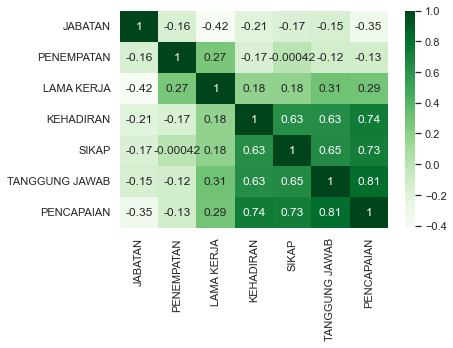

In [20]:
# grafik korelasi 
sns.heatmap(df.corr(), annot=True, cmap='Greens');

In [21]:
df.drop('JABATAN', axis=1, inplace=True)
df.drop('PENEMPATAN', axis=1, inplace=True)
df.drop('LAMA KERJA', axis=1, inplace=True)

In [22]:
df

,KEHADIRAN,SIKAP,TANGGUNG JAWAB,PENCAPAIAN,KEPUTUSAN
0,100,80,90,100,PERPANJANGAN KONTRAK
1,80,93,98,100,PERPANJANGAN KONTRAK
2,84,88,90,100,PERPANJANGAN KONTRAK
3,80,90,87,100,PERPANJANGAN KONTRAK
4,82,89,82,100,PERPANJANGAN KONTRAK
...,...,...,...,...,...
315,85,91,98,100,PERPANJANGAN KONTRAK
316,80,93,84,100,PERPANJANGAN KONTRAK
317,70,70,60,70,DIBERHENTIKAN
318,71,72,60,60,DIBERHENTIKAN


# Split data 

In [23]:
# X data
X = df.drop("KEPUTUSAN", axis=1)
X.head()

,KEHADIRAN,SIKAP,TANGGUNG JAWAB,PENCAPAIAN
0,100,80,90,100
1,80,93,98,100
2,84,88,90,100
3,80,90,87,100
4,82,89,82,100


In [24]:
# y data
y = df["KEPUTUSAN"]
y.head()

0    PERPANJANGAN KONTRAK
1    PERPANJANGAN KONTRAK
2    PERPANJANGAN KONTRAK
3    PERPANJANGAN KONTRAK
4    PERPANJANGAN KONTRAK
Name: KEPUTUSAN, dtype: object

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
len(X_train), len(X_test)

(256, 64)

In [27]:
df.KEPUTUSAN.value_counts()

PERPANJANGAN KONTRAK    256
DIBERHENTIKAN            64
Name: KEPUTUSAN, dtype: int64

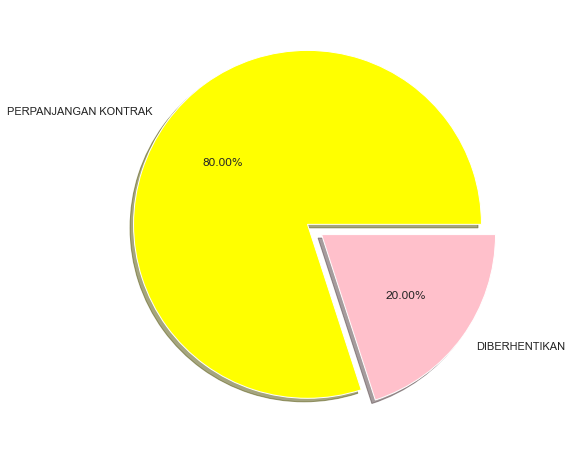

In [28]:
fig, ax = plt.subplots(figsize=(8,8))
plt.pie(x=df["KEPUTUSAN"].value_counts(),
        colors=["yellow","pink"],
        labels=["PERPANJANGAN KONTRAK","DIBERHENTIKAN"],
        shadow = True,
        autopct="%1.2f%%",
        explode = (0,0.1)
       )
plt.show()

In [29]:
# Scaling the data 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [31]:
GaussianNBClassifierScore = nb.score(X_test,y_test)
print("Accuracy obtained by Naive Bayes Classifier :", GaussianNBClassifierScore*100)

Accuracy obtained by Naive Bayes Classifier : 96.875


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


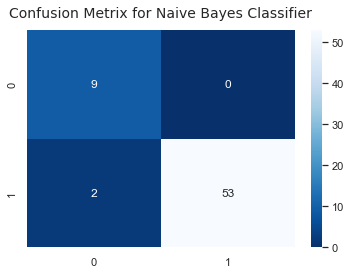

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
sns.set_style("white")
y_pred_nb = nb.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Metrix for Naive Bayes Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [33]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_nb));

                      precision    recall  f1-score   support

       DIBERHENTIKAN       0.82      1.00      0.90         9
PERPANJANGAN KONTRAK       1.00      0.96      0.98        55

            accuracy                           0.97        64
           macro avg       0.91      0.98      0.94        64
        weighted avg       0.97      0.97      0.97        64



In [34]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
DecisionTreeClassifierScore = tree.score(X_test,y_test)
print("Accuracy obtained by Decision Tree Classifier :", DecisionTreeClassifierScore*100)

Accuracy obtained by Decision Tree Classifier : 98.4375


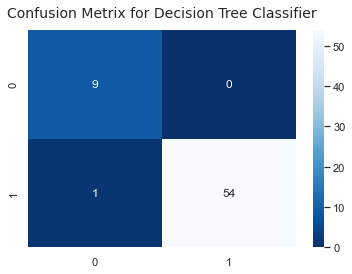

In [36]:
y_pred_tree = tree.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Metrix for Decision Tree Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [37]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_tree));

                      precision    recall  f1-score   support

       DIBERHENTIKAN       0.90      1.00      0.95         9
PERPANJANGAN KONTRAK       1.00      0.98      0.99        55

            accuracy                           0.98        64
           macro avg       0.95      0.99      0.97        64
        weighted avg       0.99      0.98      0.98        64



In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [39]:
KNeighborsClassifierScore = knn.score(X_test, y_test)
print("Accuracy obtained by K Neighbors Classifier :", KNeighborsClassifierScore*100)

Accuracy obtained by K Neighbors Classifier : 100.0


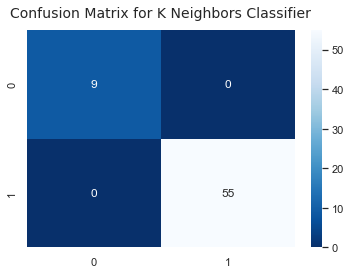

In [40]:
# Confustion Matrix 

y_pred_knn = knn.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for K Neighbors Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [41]:
print(metrics.classification_report(y_test,y_pred_knn))

                      precision    recall  f1-score   support

       DIBERHENTIKAN       1.00      1.00      1.00         9
PERPANJANGAN KONTRAK       1.00      1.00      1.00        55

            accuracy                           1.00        64
           macro avg       1.00      1.00      1.00        64
        weighted avg       1.00      1.00      1.00        64



In [42]:
y_test

181    PERPANJANGAN KONTRAK
258    PERPANJANGAN KONTRAK
15     PERPANJANGAN KONTRAK
65     PERPANJANGAN KONTRAK
216    PERPANJANGAN KONTRAK
               ...         
17     PERPANJANGAN KONTRAK
1      PERPANJANGAN KONTRAK
8      PERPANJANGAN KONTRAK
150           DIBERHENTIKAN
206           DIBERHENTIKAN
Name: KEPUTUSAN, Length: 64, dtype: object

In [43]:
y_train

209           DIBERHENTIKAN
140    PERPANJANGAN KONTRAK
217    PERPANJANGAN KONTRAK
194    PERPANJANGAN KONTRAK
5      PERPANJANGAN KONTRAK
               ...         
251    PERPANJANGAN KONTRAK
192    PERPANJANGAN KONTRAK
117    PERPANJANGAN KONTRAK
47     PERPANJANGAN KONTRAK
172    PERPANJANGAN KONTRAK
Name: KEPUTUSAN, Length: 256, dtype: object

In [44]:
x = df.iloc[5,:7]
x

KEHADIRAN                           76
SIKAP                               71
TANGGUNG JAWAB                      98
PENCAPAIAN                         100
KEPUTUSAN         PERPANJANGAN KONTRAK
Name: 5, dtype: object

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((256, 4), (64, 4), (256,), (64,))

In [46]:
from sklearn.neighbors import KNeighborsClassifier
klasifikasi=KNeighborsClassifier(n_neighbors=3,metric="euclidean")
klasifikasi.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [47]:
from sklearn import metrics
ypred=klasifikasi.predict(x_test)
print("Akurasi: ", metrics.accuracy_score(ypred,y_test))

Akurasi:  1.0


In [48]:
ypred

array(['PERPANJANGAN KONTRAK', 'PERPANJANGAN KONTRAK',
       'PERPANJANGAN KONTRAK', 'PERPANJANGAN KONTRAK',
       'PERPANJANGAN KONTRAK', 'PERPANJANGAN KONTRAK',
       'PERPANJANGAN KONTRAK', 'PERPANJANGAN KONTRAK',
       'PERPANJANGAN KONTRAK', 'PERPANJANGAN KONTRAK', 'DIBERHENTIKAN',
       'PERPANJANGAN KONTRAK', 'PERPANJANGAN KONTRAK',
       'PERPANJANGAN KONTRAK', 'PERPANJANGAN KONTRAK',
       'PERPANJANGAN KONTRAK', 'PERPANJANGAN KONTRAK',
       'PERPANJANGAN KONTRAK', 'PERPANJANGAN KONTRAK', 'DIBERHENTIKAN',
       'PERPANJANGAN KONTRAK', 'PERPANJANGAN KONTRAK',
       'PERPANJANGAN KONTRAK', 'PERPANJANGAN KONTRAK',
       'PERPANJANGAN KONTRAK', 'DIBERHENTIKAN', 'PERPANJANGAN KONTRAK',
       'PERPANJANGAN KONTRAK', 'PERPANJANGAN KONTRAK', 'DIBERHENTIKAN',
       'PERPANJANGAN KONTRAK', 'PERPANJANGAN KONTRAK',
       'PERPANJANGAN KONTRAK', 'DIBERHENTIKAN', 'PERPANJANGAN KONTRAK',
       'DIBERHENTIKAN', 'PERPANJANGAN KONTRAK', 'PERPANJANGAN KONTRAK',
       'DIBERHENTI

In [49]:
prediksi=klasifikasi.predict([[80,100,90,100]])
print("Klasifikasi untuk data baru ini adalah: ",prediksi)

Klasifikasi untuk data baru ini adalah:  ['PERPANJANGAN KONTRAK']


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [50]:
prediksi=klasifikasi.predict([[50,50,50,50]])
print("Klasifikasi untuk data baru ini adalah: ",prediksi)

Klasifikasi untuk data baru ini adalah:  ['DIBERHENTIKAN']


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [5]:
pickle.dump(klasifikasi, open("model.pkl", "wb"))

NameError: name 'klasifikasi' is not defined